<a href="https://colab.research.google.com/github/Akihiroflyfishing0127/Python_basic_kadai-/blob/main/Data_analysis_pandas_kadai007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

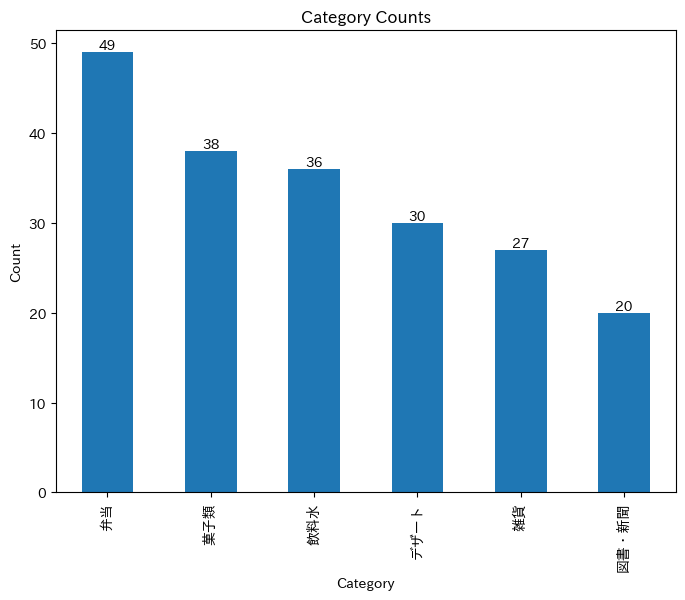

商品番号
1QJFO8QY    890
2HSTCDWM    535
48XMJXKO    270
8T7D5DQA    660
MESUDVWQ    395
QRMOGNUU    725
S6RE8W6X    430
X0ZE2ZMY    360
YY4HAAZR    425
Z4WOOIYV    465
Name: 在庫, dtype: int64
          count       mean        std  min    25%   50%    75%   max
商品番号                                                                
1QJFO8QY   32.0  27.812500  16.111381  0.0  13.75  27.5  40.00  50.0
2HSTCDWM   20.0  26.750000  15.067829  5.0  10.00  30.0  40.00  50.0
48XMJXKO   10.0  27.000000  18.737959  0.0  10.00  27.5  42.50  50.0
8T7D5DQA   21.0  31.428571  16.743869  0.0  20.00  35.0  45.00  50.0
MESUDVWQ   17.0  23.235294  15.904125  0.0  10.00  25.0  40.00  45.0
QRMOGNUU   27.0  26.851852  17.821128  0.0  10.00  20.0  45.00  50.0
S6RE8W6X   20.0  21.500000  12.680279  0.0  15.00  22.5  25.00  50.0
X0ZE2ZMY   14.0  25.714286  12.224997  0.0  21.25  25.0  30.00  45.0
YY4HAAZR   17.0  25.000000  17.677670  0.0  10.00  20.0  40.00  50.0
Z4WOOIYV   22.0  21.136364  15.578665  0.0   6.25  22

In [80]:

#!pip install japanize-matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import japanize_matplotlib
import numpy as np

df = pd.read_csv(r'/content/sample_data/sample_pandas_6.csv')

#先頭から5行目までを表示する
#df.head()

category_df = pd.read_csv(r'/content/sample_data/category.csv')
#category_df

#Merge
df = pd.merge(df, category_df[['商品番号', 'カテゴリー']], how='inner', on='商品番号')
#print(df)

#カテゴリー毎の出現回数
df1 = df['カテゴリー'].value_counts()
#print(df1)

#棒グラフ
df1.plot(kind='bar', figsize=(8, 6), title='Category Counts')

#df1の要素（カテゴリーと出現回数をリスト化し、ループしPlot）
for i, v in enumerate(df1):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


#ある基準列(商品番号列)ごとに要素をグループにまとめサブ列を集計するメソッドと、基本統計量を算出するメソッドを組み合わせたコードを記載する
#df.groupby('基準列')['サブ列'].集計関数()
#df_price = df.groupby('商品番号')['単価'].mean()
df_stock_sum = df.groupby('商品番号')['在庫'].sum()
#df_order_sum = df.groupby('商品番号')['注文数'].sum()
#print(df_price)
print(df_stock_sum)
#print(df_order_sum)

#df2 = pd.merge(df_price,df_stock_sum[['商品番号',]]],axis =1 )

df3 = df.groupby('商品番号')['在庫'].describe()
print(df3)






In [25]:
import pandas as pd
#df = pd.read_csv(r"C:\Users\atoyo\DocumentsC\Python Scripts\train.csv")
df = pd.read_csv(r'/content/sample_data/train.csv')
#df.head()

# Pythonはインデックスが0から始まるので、
# 3行目を指定するときは1を足して2になります。
#df.loc[[2]]

#df.query('POSTED_BY == "Owner"')
#df.loc[[df['TARGET(PRICE_IN_LACS)'].idxmax()]]

df['TARGET(PRICE_IN_LACS)'].describe()




,TARGET(PRICE_IN_LACS)
count,29451.000000
mean,142.898746
std,656.880713
min,0.250000
25%,38.000000
50%,62.000000
75%,100.000000
max,30000.000000


In [45]:
import pandas as pd
df = pd.read_csv(r'/content/sample_data/sample_pandas_6.csv')
# 先頭から5行目までを表示する
#df.head()

#df.query('商品番号 == "Z4WOOIYV"')
#df.query('単価 == 600')
#df.query('在庫 <= 5')
#df.query('商品番号 == "8T7D5DQA" and 在庫 <= 5')

def tax(x):
    return x * 1.10

df['単価'].apply(tax)

type(df['発注日'].loc[0])

#重要　データ型を文字から数字(datatime)へ
#df['発注日'] = pd.to_datetime(df['発注日'])

#type(pd.to_datetime(df['発注日']).loc[0])
#df.agg({'発注日':['max', 'min']})

#結合 concat
tax_series = df['単価'].apply(tax)
tax_series.name = "単価（税込み）"
pd.concat([df, tax_series], axis=1)

# Merge
category_df = pd.read_csv(r'/content/sample_data/category.csv')
category_df

df = pd.merge(df, category_df[['商品番号', 'カテゴリー']], how='inner', on='商品番号')
df

,発注日,商品番号,商品名,単価,在庫,注文数,カテゴリー
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24,弁当
1,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0,弁当
2,2021-12-11,YY4HAAZR,商品サンプル YY4HAAZR,780,50,36,弁当
3,2016-09-15,YY4HAAZR,商品サンプル YY4HAAZR,780,5,54,弁当
4,2024-01-18,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24,弁当
...,...,...,...,...,...,...,...
195,2019-04-29,2HSTCDWM,商品サンプル 2HSTCDWM,300,10,48,デザート
196,2022-11-10,2HSTCDWM,商品サンプル 2HSTCDWM,300,35,42,デザート
197,2015-02-08,2HSTCDWM,商品サンプル 2HSTCDWM,300,5,0,デザート
198,2019-03-30,2HSTCDWM,商品サンプル 2HSTCDWM,300,40,24,デザート
